In [1]:
%load_ext autoreload
%autoreload 2
import os
if 1:
    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import sys
sys.path.insert(0, "..")

import warnings
warnings.filterwarnings("ignore")

from analog.analog_chip import *
from analog.analog_frate import *
from analog.analog_syntax import *
from analog.analog_helpers import *
from analog.analog_quantizer import *
from analog.analog_generator_onnx import *
from analog.analog_classes import *
from analog.analog_mapper import Mapper

import onnx

from pprint import pprint
from onnx import numpy_helper
%matplotlib inline

import cv2
from torchvision.utils import save_image
from torchvision import transforms

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Which device: ', device)

Which device:  cuda


In [3]:
model = load_timm_model('resnet50').to(device)

In [4]:
testl = model.layer1[0].conv3

In [5]:
testl

Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))

In [6]:
testl.weight

Parameter containing:
tensor([[[[-0.0805]],

         [[-0.1041]],

         [[-0.0204]],

         ...,

         [[-0.0196]],

         [[-0.0118]],

         [[ 0.0458]]],


        [[[ 0.0194]],

         [[ 0.0094]],

         [[ 0.0142]],

         ...,

         [[ 0.0035]],

         [[ 0.0062]],

         [[ 0.0050]]],


        [[[ 0.0797]],

         [[-0.0351]],

         [[ 0.0815]],

         ...,

         [[ 0.0850]],

         [[-0.0902]],

         [[ 0.2176]]],


        ...,


        [[[ 0.0434]],

         [[ 0.0379]],

         [[-0.0020]],

         ...,

         [[-0.0211]],

         [[-0.0075]],

         [[-0.0129]]],


        [[[ 0.0131]],

         [[ 0.0168]],

         [[ 0.0075]],

         ...,

         [[-0.0079]],

         [[-0.0114]],

         [[-0.0302]]],


        [[[ 0.0290]],

         [[ 0.1065]],

         [[-0.0225]],

         ...,

         [[-0.1672]],

         [[ 0.0502]],

         [[-0.1232]]]], device='cuda:0')

In [7]:
testl.weight.shape

torch.Size([256, 64, 1, 1])

In [8]:
testl.bias

Parameter containing:
tensor([-3.8385e-01, -4.5495e-01, -1.2973e+00, -4.3835e-01,  1.5529e-01,
         9.8473e-02,  1.3188e-01,  1.4590e+00,  3.3400e-01,  2.7655e+00,
         1.4287e+00, -1.4195e+00,  6.4767e-01,  1.6614e-01,  9.3277e-01,
         2.5492e-01,  3.7273e-01, -5.6434e-01, -4.4180e-01, -3.9998e-01,
        -9.0364e-01,  1.0285e+00,  2.1217e+00, -1.1287e+00,  1.3769e+00,
         5.8281e-01, -2.1423e-02,  8.0320e-01, -2.1050e-01,  9.5685e-01,
        -5.0138e-01, -7.7213e-01, -9.1585e-01,  2.6579e+00,  1.2267e+00,
         1.5572e+00, -4.8334e-01,  2.6889e+00, -9.4183e-01,  1.5951e+00,
        -2.7871e-01, -7.5396e-01,  9.2791e-02,  7.1057e-01,  1.4925e-03,
        -5.6236e-01, -1.4620e-01, -2.5792e-01,  2.6628e-01, -3.5881e-01,
         2.1596e-01, -1.3121e-01, -6.0912e-01, -1.4016e-01,  1.1974e+00,
         6.9443e-01, -6.9590e-01,  1.7579e+00,  2.6466e-01, -1.1843e-01,
         8.5849e-01,  1.0503e+00,  1.1684e+00,  1.9285e+00, -1.5797e+00,
         1.4131e+00, -5.4644e

In [9]:
testl.bias.shape

torch.Size([256])

In [10]:
for n, m in model.named_modules():
    print(n, m)

 ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=

In [11]:
for n, m in model.named_modules():
    print(n)


conv1
bn1
act1
maxpool
layer1
layer1.0
layer1.0.conv1
layer1.0.bn1
layer1.0.act1
layer1.0.conv2
layer1.0.bn2
layer1.0.act2
layer1.0.conv3
layer1.0.bn3
layer1.0.act3
layer1.0.downsample
layer1.0.downsample.0
layer1.0.downsample.1
layer1.1
layer1.1.conv1
layer1.1.bn1
layer1.1.act1
layer1.1.conv2
layer1.1.bn2
layer1.1.act2
layer1.1.conv3
layer1.1.bn3
layer1.1.act3
layer1.2
layer1.2.conv1
layer1.2.bn1
layer1.2.act1
layer1.2.conv2
layer1.2.bn2
layer1.2.act2
layer1.2.conv3
layer1.2.bn3
layer1.2.act3
layer2
layer2.0
layer2.0.conv1
layer2.0.bn1
layer2.0.act1
layer2.0.conv2
layer2.0.bn2
layer2.0.act2
layer2.0.conv3
layer2.0.bn3
layer2.0.act3
layer2.0.downsample
layer2.0.downsample.0
layer2.0.downsample.1
layer2.1
layer2.1.conv1
layer2.1.bn1
layer2.1.act1
layer2.1.conv2
layer2.1.bn2
layer2.1.act2
layer2.1.conv3
layer2.1.bn3
layer2.1.act3
layer2.2
layer2.2.conv1
layer2.2.bn1
layer2.2.act1
layer2.2.conv2
layer2.2.bn2
layer2.2.act2
layer2.2.conv3
layer2.2.bn3
layer2.2.act3
layer2.3
layer2.3.conv1


In [12]:
for n, m in model.named_modules():
    if isinstance(m , nn.Conv2d):
        print(m)

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1))
Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2))
Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1))
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 512, kernel_size=(1, 1), 

In [13]:
for n, m in model.named_modules():
    if isinstance(m, nn.ReLU):
        print(m)

ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)
ReLU(inplace=True)


In [14]:
testl.weight.shape

torch.Size([256, 64, 1, 1])

In [15]:
testl.weight.reshape(-1).shape

torch.Size([16384])

In [16]:
testl.weight.reshape(-1).cpu().numpy()

array([-0.08047199, -0.10414819, -0.02040902, ..., -0.1672316 ,
        0.05019666, -0.12317822], dtype=float32)

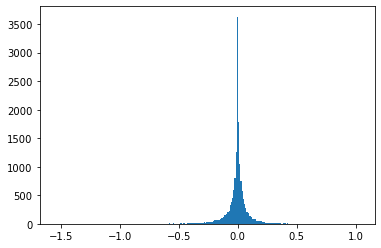

In [17]:
plt.hist(testl.weight.reshape(-1).cpu().numpy(), 256)
plt.show()

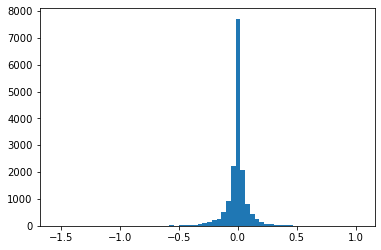

In [18]:
plt.hist(testl.weight.reshape(-1).cpu().numpy(), 64)
plt.show()

In [19]:
for idx, (n, m) in enumerate(model.named_modules()):
    if isinstance(m, nn.Conv2d):
        print(idx, m)

1 Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
7 Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
10 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
13 Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
17 Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
20 Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
23 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
26 Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
30 Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
33 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
36 Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
41 Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
44 Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
47 Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1))
51 Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2))
54 Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1))
57 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padd

In [20]:
model;

In [36]:
class UpDown(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        t = np.flipud(x.cpu().numpy())
        return torch.tensor(t.copy())

In [37]:
test_model = UpDown()

In [38]:
test_tensor = torch.randn(100, 100)

In [41]:
out = test_model.forward(test_tensor)
out = torch.from_numpy(np.array(out))
out

tensor([[ 0.3634,  1.1517,  0.5320,  ..., -0.3143,  0.7350,  1.1188],
        [ 0.6187,  0.4039, -0.4422,  ...,  0.9351,  1.8302,  1.5736],
        [ 0.2399, -0.7680, -0.4209,  ...,  1.0746, -0.2815, -0.2051],
        ...,
        [ 0.3627, -0.2245,  0.4825,  ...,  0.1424, -1.5269, -0.5087],
        [ 0.1218, -1.3637, -0.6606,  ...,  0.1022,  0.3407, -0.5207],
        [-0.4974, -1.3320, -1.1070,  ..., -0.4382, -0.1191,  0.0185]])

In [42]:
out1 = np.flipud(test_tensor.cpu().numpy())
out1 = torch.from_numpy(out1.copy())
out1

tensor([[ 0.3634,  1.1517,  0.5320,  ..., -0.3143,  0.7350,  1.1188],
        [ 0.6187,  0.4039, -0.4422,  ...,  0.9351,  1.8302,  1.5736],
        [ 0.2399, -0.7680, -0.4209,  ...,  1.0746, -0.2815, -0.2051],
        ...,
        [ 0.3627, -0.2245,  0.4825,  ...,  0.1424, -1.5269, -0.5087],
        [ 0.1218, -1.3637, -0.6606,  ...,  0.1022,  0.3407, -0.5207],
        [-0.4974, -1.3320, -1.1070,  ..., -0.4382, -0.1191,  0.0185]])

In [44]:
out1 - out

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [43]:
torch.var(out1 - out)

tensor(0.)

In [47]:
snr(out1, out)

149.96957397460938

In [48]:
cv1 = nn.Conv2d(3, 32, stride=1, kernel_size=3)
cv1

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))

In [51]:
class TestModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.cv1 = nn.Conv2d(3, 32, stride=1, kernel_size=2)
        self.cv2 = nn.Conv2d(32, 64, stride=1, kernel_size=2)
        self.cv3 = nn.Conv2d(64, 128, stride=1, kernel_size=3)
        
    def forward(self, x):
        y = self.cv1(x)
        y = self.cv2(y)
        y = self.cv3(y)
        return y

In [95]:
test_model1 = TestModel()
test_model1

TestModel(
  (cv1): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1))
  (cv2): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  (cv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
)

In [58]:
test_tensor1 = torch.randn(1, 3, 128, 128)
test_tensor1

tensor([[[[-0.3558, -0.2554, -0.6616,  ...,  1.0590,  1.6386,  1.0307],
          [ 0.3523,  0.7479,  2.2548,  ...,  0.3398, -3.2841, -1.2362],
          [-0.1321,  1.2746, -0.2466,  ..., -0.2967,  0.8163, -1.1057],
          ...,
          [-0.8090,  1.4293, -1.6168,  ..., -0.7407, -0.9142,  0.8703],
          [ 0.7949, -0.8999,  0.2811,  ..., -0.3268,  0.0657, -0.7682],
          [-0.0406, -1.6580,  0.0047,  ...,  1.7284, -0.5688, -1.5191]],

         [[-1.5578, -1.7311, -1.7664,  ...,  0.6350,  0.3629, -0.3014],
          [ 0.0977, -0.1454, -0.7075,  ..., -0.6281, -0.8113,  0.3255],
          [ 0.4486, -2.6757,  1.0506,  ..., -0.5088,  0.5591,  0.1413],
          ...,
          [-1.0188,  0.3837,  1.4749,  ..., -0.0977,  0.1758, -0.7070],
          [-0.0510, -0.3932,  0.1966,  ...,  0.5152, -0.1039, -1.0554],
          [ 1.6757, -1.1234, -0.6227,  ..., -0.5629,  0.2914, -1.5882]],

         [[-0.3152, -1.0524, -0.0978,  ...,  1.3363, -1.4213, -0.9886],
          [-1.6175, -0.2383, -

In [64]:
out1 = test_model1(test_tensor1)
out1.shape

torch.Size([1, 128, 124, 124])

In [68]:
test_model1

TestModel(
  (cv1): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1))
  (cv2): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  (cv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
)

In [96]:
t1 = deepcopy(test_model1)
t1

TestModel(
  (cv1): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1))
  (cv2): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  (cv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
)

In [97]:
t1.cv1 = UpDown()
t1

TestModel(
  (cv1): UpDown()
  (cv2): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  (cv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
)

In [69]:
for idx, (n, m) in enumerate(test_model1.named_modules()):
    if isinstance(m, nn.Conv2d):
        print(idx, m)

1 Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1))
2 Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
3 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))


In [85]:
for idx, (n, m) in enumerate(test_model1.named_modules()):
    if isinstance(m, nn.Conv2d):
        print(idx, n)

1 cv1
2 cv2
3 cv3


In [80]:
exec('a=8')
a

8

In [84]:
a = 9
exec(f'{a}')
a

9

In [100]:
for idx, (n, m) in enumerate(test_model1.named_modules()):
    if isinstance(m, nn.Conv2d):
        c = UpDown()
        command = f'test_model1.{n} = c'
        exec(command)

In [101]:
test_model1

TestModel(
  (cv1): UpDown()
  (cv2): UpDown()
  (cv3): UpDown()
)

In [102]:
torch.save(test_model1, 'test_model.pt')

In [103]:
abc = torch.load('test_model.pt')
abc

TestModel(
  (cv1): UpDown()
  (cv2): UpDown()
  (cv3): UpDown()
)

In [104]:
test_dict = {1:100, 2:200, 3:300}
test_dict

{1: 100, 2: 200, 3: 300}

In [105]:
torch.save(test_dict, 'test_dict.zz')

In [107]:
hi = torch.load('test_dict.zz')
hi

{1: 100, 2: 200, 3: 300}

In [108]:
dir(test_model1)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_m

In [110]:
hasattr(test_model1, 'cv3')

True

In [111]:
hasattr(test_model1, 'cv4')

False

In [112]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(

In [115]:
for idx, (n, m) in enumerate(model.named_modules()):
    if isinstance(m, nn.Conv2d):
        print(idx, m.bias.shape)

1 torch.Size([64])
7 torch.Size([64])
10 torch.Size([64])
13 torch.Size([256])
17 torch.Size([256])
20 torch.Size([64])
23 torch.Size([64])
26 torch.Size([256])
30 torch.Size([64])
33 torch.Size([64])
36 torch.Size([256])
41 torch.Size([128])
44 torch.Size([128])
47 torch.Size([512])
51 torch.Size([512])
54 torch.Size([128])
57 torch.Size([128])
60 torch.Size([512])
64 torch.Size([128])
67 torch.Size([128])
70 torch.Size([512])
74 torch.Size([128])
77 torch.Size([128])
80 torch.Size([512])
85 torch.Size([256])
88 torch.Size([256])
91 torch.Size([1024])
95 torch.Size([1024])
98 torch.Size([256])
101 torch.Size([256])
104 torch.Size([1024])
108 torch.Size([256])
111 torch.Size([256])
114 torch.Size([1024])
118 torch.Size([256])
121 torch.Size([256])
124 torch.Size([1024])
128 torch.Size([256])
131 torch.Size([256])
134 torch.Size([1024])
138 torch.Size([256])
141 torch.Size([256])
144 torch.Size([1024])
149 torch.Size([512])
152 torch.Size([512])
155 torch.Size([2048])
159 torch.Size([20

In [116]:
for idx, (n, m) in enumerate(model.named_modules()):
    if isinstance(m, nn.Conv2d):
        print(hasattr(m, 'bias'))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
